In [15]:
import numpy as np

# Create a grid of 1001 equally spaced values between 0 and 1
# More grid points = better approximation but slower computation
p_grid = np.linspace(0, 1, 1001)
print(f"Parameter grid: {p_grid[:5]}...{p_grid[-5:]}")  # Show first and last 5 values
print(f"Grid size: {len(p_grid)} points")

Parameter grid: [0.    0.001 0.002 0.003 0.004]...[0.996 0.997 0.998 0.999 1.   ]
Grid size: 1001 points


# Globe Tossing Problem - Bayesian Grid Approximation

## Problem Statement

This notebook implements the classic globe tossing example from **Statistical Rethinking Chapter 2**. We observe a sequence of tosses of a globe, recording whether each toss lands on water (W) or land (L). Our goal is to estimate the proportion of water on the globe using Bayesian inference.

## Bayesian Framework

Bayesian inference follows a simple conceptual formula:

$$P(\text{parameters}|\text{data}) \propto P(\text{data}|\text{parameters}) \times P(\text{parameters})$$

Or more formally:

$$\text{Posterior} \propto \text{Likelihood} \times \text{Prior}$$

### The Grid Approximation Method

Since we can't always compute the posterior analytically, we use **grid approximation**:

1. Define a grid of parameter values
2. Compute the prior probability for each parameter value
3. Compute the likelihood for each parameter value
4. Multiply prior by likelihood to get the unnormalized posterior
5. Normalize by dividing by the sum

## Step 1: Define Parameter Grid

We'll estimate the probability $p$ that a toss lands on water. Since $p$ is a proportion, it must be between 0 and 1."

In [16]:
# Uniform prior: all values equally likely
prior = np.ones_like(p_grid)  # Creates array of 1's with same shape as p_grid
print(f"Prior shape: {prior.shape}")
print(f"All prior values equal? {np.all(prior == 1.0)}")

Prior shape: (1001,)
All prior values equal? True


## Step 2: Define the Prior

The **prior** represents our beliefs about the parameter before seeing any data. Here we use a **uniform prior**, meaning all values of $p$ between 0 and 1 are equally likely:

$$P(p) = 1 \quad \text{for } p \in [0,1]$$

This represents maximum ignorance - we have no reason to believe any particular value of $p$ is more likely than any other."

In [17]:
# Define our observed data
W = 6  # Number of water tosses observed
N = 9  # Total number of tosses

# Calculate likelihood for each possible value of p
# Likelihood = p^W * (1-p)^(N-W)
likelihood = np.power(p_grid, W) * np.power((1 - p_grid), (N - W))

print(f"Data: {W} water tosses out of {N} total tosses")
print(f"Likelihood shape: {likelihood.shape}")
print(f"Max likelihood at p = {p_grid[np.argmax(likelihood)]:.3f}")

Data: 6 water tosses out of 9 total tosses
Likelihood shape: (1001,)
Max likelihood at p = 0.667


## Step 3: Define the Likelihood

The **likelihood** tells us how probable our observed data is for each possible value of $p$. 

### Our Data
- We observed 9 tosses total ($N = 9$)
- 6 tosses landed on water ($W = 6$)
- 3 tosses landed on land ($L = 3$)

### Binomial Likelihood

Since each toss is independent with probability $p$ of landing on water, the number of water tosses follows a binomial distribution:

$$P(\text{data}|p) = \binom{N}{W} p^W (1-p)^{N-W}$$

For our data:
$$P(\text{6 water in 9 tosses}|p) = \binom{9}{6} p^6 (1-p)^3$$

Since $\binom{9}{6}$ is constant across all values of $p$, we can ignore it for the grid approximation (it will cancel out during normalization)."

In [18]:
# Step 4a: Compute unnormalized posterior
# Posterior ∝ Likelihood × Prior
posterior_unnorm = likelihood * prior
print(f"Unnormalized posterior sum: {posterior_unnorm.sum():.6f}")

Unnormalized posterior sum: 1.190476


## Step 4: Compute the Posterior

Now we combine the prior and likelihood to get the posterior distribution:

$$P(p|\text{data}) = \frac{P(\text{data}|p) \times P(p)}{P(\text{data})}$$

Where:
- $P(p|\text{data})$ is the **posterior** - our updated belief about $p$ after seeing the data
- $P(\text{data}|p)$ is the **likelihood** - how probable the data is given $p$
- $P(p)$ is the **prior** - our initial belief about $p$
- $P(\text{data})$ is the **marginal likelihood** or **evidence** - a normalizing constant

Since $P(\text{data})$ is just a normalizing constant, we can compute the unnormalized posterior and then normalize:"

In [19]:
# Step 4b: Normalize the posterior
# Divide by sum to make it a proper probability distribution
posterior = posterior_unnorm / posterior_unnorm.sum()

# Verify normalization - should sum to 1
print(f"Normalized posterior sum: {posterior.sum():.6f}")
print(f"Maximum posterior probability: {posterior.max():.6f}")
print(f"MAP estimate (mode): p = {p_grid[np.argmax(posterior)]:.3f}")

Normalized posterior sum: 1.000000
Maximum posterior probability: 0.002731
MAP estimate (mode): p = 0.667


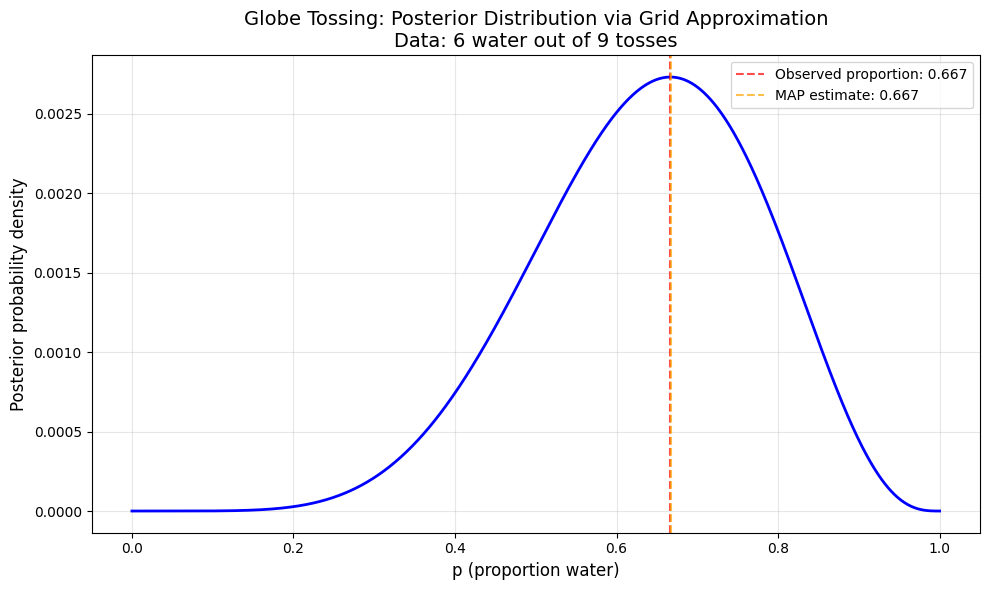

In [20]:
import matplotlib.pyplot as plt

# Create the posterior plot
plt.figure(figsize=(10, 6))
plt.plot(p_grid, posterior, 'b-', linewidth=2)
plt.axvline(x=W/N, color='red', linestyle='--', alpha=0.7, 
            label=f'Observed proportion: {W/N:.3f}')
plt.axvline(x=p_grid[np.argmax(posterior)], color='orange', linestyle='--', alpha=0.7,
            label=f'MAP estimate: {p_grid[np.argmax(posterior)]:.3f}')

plt.xlabel('p (proportion water)', fontsize=12)
plt.ylabel('Posterior probability density', fontsize=12)
plt.title('Globe Tossing: Posterior Distribution via Grid Approximation\n' + 
          f'Data: {W} water out of {N} tosses', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 5: Visualize the Results

Let's plot our posterior distribution to see what we've learned about the proportion of water on the globe."

In [21]:
# Posterior mean - expected value of p
post_mean = (p_grid * posterior).sum()
print(f"Posterior mean: {post_mean:.4f}")

# Compare to theoretical result for Beta-Binomial conjugacy
# With uniform prior and W successes, N trials: mean = (W+1)/(N+2)
theoretical_mean = (W + 1) / (N + 2)
print(f"Theoretical mean (Beta-Binomial): {theoretical_mean:.4f}")

# The frequentist estimate (MLE)
mle_estimate = W / N
print(f"Maximum likelihood estimate: {mle_estimate:.4f}")

Posterior mean: 0.6364
Theoretical mean (Beta-Binomial): 0.6364
Maximum likelihood estimate: 0.6667


## Step 6: Posterior Summary Statistics

Now let's extract some key summary statistics from our posterior distribution to quantify our uncertainty about $p$."

In [22]:
# Probability that p > 0.5 (more water than land)
prob_p_gt_0_5 = posterior[p_grid > 0.5].sum()
print(f"P(p > 0.5 | data) = {prob_p_gt_0_5:.4f}")
print(f"This means there's a {prob_p_gt_0_5*100:.1f}% chance that water covers more than half the globe")

# Let's also compute P(p > 0.6) and P(p < 0.8)
prob_p_gt_0_6 = posterior[p_grid > 0.6].sum()
prob_p_lt_0_8 = posterior[p_grid < 0.8].sum()

print(f"P(p > 0.6 | data) = {prob_p_gt_0_6:.4f}")
print(f"P(p < 0.8 | data) = {prob_p_lt_0_8:.4f}")
print(f"P(0.6 < p < 0.8 | data) = {posterior[(p_grid > 0.6) & (p_grid < 0.8)].sum():.4f}")

P(p > 0.5 | data) = 0.8273
This means there's a 82.7% chance that water covers more than half the globe
P(p > 0.6 | data) = 0.6165
P(p < 0.8 | data) = 0.8782
P(0.6 < p < 0.8 | data) = 0.4947


## Key Insights and Interpretation

### What We've Learned

1. **Posterior Distribution**: Our belief about $p$ is no longer uniform. The data has updated our beliefs, concentrating probability around values near the observed proportion (6/9 ≈ 0.67).

2. **Point Estimates**: 
   - **MAP (Maximum A Posteriori)**: The most probable value of $p$ given our data
   - **Posterior Mean**: The expected value of $p$ under the posterior distribution
   - **MLE (Maximum Likelihood)**: The value that makes the observed data most probable

3. **Uncertainty Quantification**: Unlike frequentist methods, Bayesian inference naturally provides uncertainty estimates through the posterior distribution.

### Mathematical Notes

- **Beta-Binomial Conjugacy**: With a uniform prior (Beta(1,1)) and binomial likelihood, the posterior is Beta(W+1, N-W+1)
- **Grid Approximation vs. Analytical**: Our grid approximation should closely match the analytical Beta(7,4) distribution
- **Effect of Sample Size**: More data would make the posterior more concentrated (less uncertain)

### Next Steps

- Try different priors (informative vs. non-informative)
- Increase sample size to see how uncertainty decreases
- Compare grid approximation with analytical solutions
- Implement credible intervals (Bayesian confidence intervals)"